# Heart Disease K-Means Clustering Analysis

## Project Overview
This notebook performs unsupervised machine learning analysis using K-Means clustering on a heart disease dataset. The goal is to identify natural groupings of patients based on their clinical features.

**Dataset**: Heart Disease Dataset (920 patient records)

**Kaggle Link**: https://www.kaggle.com/competitions/k-means-clustering-for-heart-disease-analysis/overview

**Objective**: Use K-Means clustering to group patients into distinct clusters based on cardiovascular health indicators.

---

## Phase 1: Preprocessing & EDA

### Step 1: Setup & Data Loading

In [1]:
#4 Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Machine Learning libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples

# Configure visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


In [2]:
#5 Load the dataset
df = pd.read_csv('heart_disease.csv')

# Display first few rows
print("Dataset loaded successfully!\n")
print(f"Dataset shape: {df.shape[0]} rows × {df.shape[1]} columns\n")
df.head(10)

Dataset loaded successfully!

Dataset shape: 920 rows × 15 columns



,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,0,63,Male,Cleveland,typical angina,145.000,233.000,True,lv hypertrophy,150.000,False,2.300,downsloping,0.000,fixed defect
1,1,67,Male,Cleveland,asymptomatic,160.000,286.000,False,lv hypertrophy,108.000,True,1.500,flat,3.000,normal
2,2,67,Male,Cleveland,asymptomatic,120.000,229.000,False,lv hypertrophy,129.000,True,2.600,flat,2.000,reversable defect
3,3,37,Male,Cleveland,non-anginal,130.000,250.000,False,normal,187.000,False,3.500,downsloping,0.000,normal
4,4,41,Female,Cleveland,atypical angina,130.000,204.000,False,lv hypertrophy,172.000,False,1.400,upsloping,0.000,normal
5,5,56,Male,Cleveland,atypical angina,120.000,236.000,False,normal,178.000,False,0.800,upsloping,0.000,normal
6,6,62,Female,Cleveland,asymptomatic,140.000,268.000,False,lv hypertrophy,160.000,False,3.600,downsloping,2.000,normal
7,7,57,Female,Cleveland,asymptomatic,120.000,354.000,False,normal,163.000,True,0.600,upsloping,0.000,normal
8,8,63,Male,Cleveland,asymptomatic,130.000,254.000,False,lv hypertrophy,147.000,False,1.400,flat,1.000,reversable defect
9,9,53,Male,Cleveland,asymptomatic,140.000,203.000,True,lv hypertrophy,155.000,True,3.100,downsloping,0.000,reversable defect


**Key observations:**
- Dataset contains **920 patient records** with **15 columns**
- Features include both numerical (age, blood pressure, cholesterol) and categorical (sex, chest pain type, ECG results) variables
- The dataset appears to be from multiple sources (Cleveland, VA Long Beach datasets)

**Feature descriptions:**
- `id`: Patient identifier
- `age`: Age in years
- `sex`: Male/Female
- `dataset`: Source dataset
- `cp`: Chest pain type (typical angina, atypical angina, non-anginal, asymptomatic)
- `trestbps`: Resting blood pressure (mm Hg)
- `chol`: Serum cholesterol (mg/dl)
- `fbs`: Fasting blood sugar > 120 mg/dl (True/False)
- `restecg`: Resting electrocardiographic results
- `thalch`: Maximum heart rate achieved
- `exang`: Exercise induced angina (True/False)
- `oldpeak`: ST depression induced by exercise
- `slope`: Slope of peak exercise ST segment
- `ca`: Number of major vessels colored by fluoroscopy
- `thal`: Thalassemia type

### Step 2: Initial Data Exploration

In [3]:
#7 Display basic dataset information
print("="*80)
print("DATASET OVERVIEW")
print("="*80)
print(f"\nDataset Shape: {df.shape}")
print(f"Total Records: {df.shape[0]}")
print(f"Total Features: {df.shape[1]}")
print(f"\nMemory Usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")

DATASET OVERVIEW

Dataset Shape: (920, 15)
Total Records: 920
Total Features: 15

Memory Usage: 406.44 KB


In [4]:
#8 Display data types and non-null counts
print("\n" + "="*80)
print("DATA TYPES AND NON-NULL COUNTS")
print("="*80 + "\n")
df.info()


DATA TYPES AND NON-NULL COUNTS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
dtypes: float64(5), int64(2), object(8)
memory usage: 107.9+ KB


In [5]:
#9 Check for missing values
print("\n" + "="*80)
print("MISSING VALUES ANALYSIS")
print("="*80 + "\n")

missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})

missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_data) > 0:
    print("Columns with missing values:\n")
    print(missing_data.to_string(index=False))
    print(f"\n\nTotal missing values: {df.isnull().sum().sum()}")
    print(f"Percentage of total data: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100):.2f}%")
else:
    print("✓ No missing values found in the dataset!")


MISSING VALUES ANALYSIS

Columns with missing values:

  Column  Missing_Count  Missing_Percentage
      ca            611              66.410
    thal            486              52.830
   slope            309              33.590
     fbs             90               9.780
 oldpeak             62               6.740
trestbps             59               6.410
  thalch             55               5.980
   exang             55               5.980
    chol             30               3.260
 restecg              2               0.220


Total missing values: 1759
Percentage of total data: 12.75%


**Missing Values Detected:**
- `ca` (coronary vessels): 66.4% missing
- `thal` (thalassemia): 52.8% missing
- `slope`: 33.6% missing
- Other features have <10% missing
- Total: 1,759 missing values (12.75% of all data)

In [6]:
#11 Analyze missing values by dataset source
print("\n" + "="*80)
print("MISSING VALUES BY DATASET SOURCE")
print("="*80 + "\n")

for dataset_name in df['dataset'].unique():
    dataset_subset = df[df['dataset'] == dataset_name]
    missing_count = dataset_subset.isnull().sum().sum()
    total_cells = dataset_subset.shape[0] * dataset_subset.shape[1]
    missing_pct = (missing_count / total_cells * 100)
    
    print(f"{dataset_name}:")
    print(f"  Records: {dataset_subset.shape[0]}")
    print(f"  Missing values: {missing_count} ({missing_pct:.2f}%)")
    
    # Show which columns have missing values in this dataset
    cols_with_missing = dataset_subset.isnull().sum()
    cols_with_missing = cols_with_missing[cols_with_missing > 0].sort_values(ascending=False)
    
    if len(cols_with_missing) > 0:
        print(f"  Columns with missing data:")
        for col, count in cols_with_missing.items():
            print(f"    - {col}: {count} ({count/dataset_subset.shape[0]*100:.1f}%)")
    print()


MISSING VALUES BY DATASET SOURCE

Cleveland:
  Records: 304
  Missing values: 9 (0.20%)
  Columns with missing data:
    - ca: 5 (1.6%)
    - thal: 3 (1.0%)
    - slope: 1 (0.3%)

Hungary:
  Records: 293
  Missing values: 779 (17.72%)
  Columns with missing data:
    - ca: 290 (99.0%)
    - thal: 265 (90.4%)
    - slope: 189 (64.5%)
    - chol: 23 (7.8%)
    - fbs: 8 (2.7%)
    - trestbps: 1 (0.3%)
    - restecg: 1 (0.3%)
    - thalch: 1 (0.3%)
    - exang: 1 (0.3%)

Switzerland:
  Records: 123
  Missing values: 273 (14.80%)
  Columns with missing data:
    - ca: 118 (95.9%)
    - fbs: 75 (61.0%)
    - thal: 52 (42.3%)
    - slope: 17 (13.8%)
    - oldpeak: 6 (4.9%)
    - trestbps: 2 (1.6%)
    - restecg: 1 (0.8%)
    - thalch: 1 (0.8%)
    - exang: 1 (0.8%)

VA Long Beach:
  Records: 200
  Missing values: 698 (23.27%)
  Columns with missing data:
    - ca: 198 (99.0%)
    - thal: 166 (83.0%)
    - slope: 102 (51.0%)
    - trestbps: 56 (28.0%)
    - oldpeak: 56 (28.0%)
    - thalch: 5

**Missing Values by Dataset Source:**
- **Cleveland**: 0.20% missing (highest quality)
- **Hungary**: 17.72% missing
- **Switzerland**: 14.80% missing
- **VA Long Beach**: 23.27% missing (lowest quality)
- Missing data varies significantly by source dataset

In [7]:
#13 Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()

print("\n" + "="*80)
print("FEATURE TYPES")
print("="*80 + "\n")

print(f"Numerical Features ({len(numerical_cols)}):")
print(f"  {', '.join(numerical_cols)}\n")

print(f"Categorical Features ({len(categorical_cols)}):")
print(f"  {', '.join(categorical_cols)}")


FEATURE TYPES

Numerical Features (7):
  id, age, trestbps, chol, thalch, oldpeak, ca

Categorical Features (8):
  sex, dataset, cp, fbs, restecg, exang, slope, thal


**Feature Types:**
- **Numerical (7)**: id, age, trestbps, chol, thalch, oldpeak, ca
- **Categorical (8)**: sex, dataset, cp, fbs, restecg, exang, slope, thal
- Note: `id` and `dataset` are identifiers, not useful for clustering

In [8]:
#15 Statistical summary of numerical features
print("\n" + "="*80)
print("STATISTICAL SUMMARY - NUMERICAL FEATURES")
print("="*80 + "\n")

df[numerical_cols].describe().T


STATISTICAL SUMMARY - NUMERICAL FEATURES



,count,mean,std,min,25%,50%,75%,max
id,920.000,459.500,265.725,0.000,229.750,459.500,689.250,919.000
age,920.000,53.511,9.425,28.000,47.000,54.000,60.000,77.000
trestbps,861.000,132.132,19.066,0.000,120.000,130.000,140.000,200.000
chol,890.000,199.130,110.781,0.000,175.000,223.000,268.000,603.000
thalch,865.000,137.546,25.926,60.000,120.000,140.000,157.000,202.000
oldpeak,858.000,0.879,1.091,-2.600,0.000,0.500,1.500,6.200
ca,309.000,0.676,0.936,0.000,0.000,0.000,1.000,3.000


**Numerical Feature Statistics:**
- **Age**: Mean 53.5 years (range: 28-77)
- **Blood Pressure**: Mean 132 mm Hg (range: 0-200, note: 0 likely indicates missing data)
- **Cholesterol**: Mean 199 mg/dl (range: 0-603, note: 0 likely indicates missing data)
- **Max Heart Rate**: Mean 138 bpm (range: 60-202)
- **ST Depression**: Mean 0.88 (range: -2.6 to 6.2)

In [9]:
#17 Summary of categorical features
print("\n" + "="*80)
print("CATEGORICAL FEATURES SUMMARY")
print("="*80 + "\n")

for col in categorical_cols:
    print(f"\n{col.upper()}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Value counts:")
    value_counts = df[col].value_counts()
    for val, count in value_counts.items():
        percentage = (count / len(df) * 100)
        print(f"    - {val}: {count} ({percentage:.1f}%)")


CATEGORICAL FEATURES SUMMARY


SEX:
  Unique values: 2
  Value counts:
    - Male: 726 (78.9%)
    - Female: 194 (21.1%)

DATASET:
  Unique values: 4
  Value counts:
    - Cleveland: 304 (33.0%)
    - Hungary: 293 (31.8%)
    - VA Long Beach: 200 (21.7%)
    - Switzerland: 123 (13.4%)

CP:
  Unique values: 4
  Value counts:
    - asymptomatic: 496 (53.9%)
    - non-anginal: 204 (22.2%)
    - atypical angina: 174 (18.9%)
    - typical angina: 46 (5.0%)

FBS:
  Unique values: 2
  Value counts:
    - False: 692 (75.2%)
    - True: 138 (15.0%)

RESTECG:
  Unique values: 3
  Value counts:
    - normal: 551 (59.9%)
    - lv hypertrophy: 188 (20.4%)
    - st-t abnormality: 179 (19.5%)

EXANG:
  Unique values: 2
  Value counts:
    - False: 528 (57.4%)
    - True: 337 (36.6%)

SLOPE:
  Unique values: 3
  Value counts:
    - flat: 345 (37.5%)
    - upsloping: 203 (22.1%)
    - downsloping: 63 (6.8%)

THAL:
  Unique values: 3
  Value counts:
    - normal: 196 (21.3%)
    - reversable defect: 19

**Categorical Feature Distribution:**
- **Sex**: 79% Male, 21% Female (imbalanced)
- **Chest Pain**: 54% asymptomatic, 22% non-anginal, 19% atypical angina, 5% typical angina
- **Fasting Blood Sugar**: 75% False, 15% True
- **ECG Results**: 60% normal, 20% LV hypertrophy, 20% ST-T abnormality
- **Exercise Angina**: 57% No, 37% Yes
- **Slope**: 38% flat, 22% upsloping, 7% downsloping

In [10]:
#19 Check for duplicate rows
print("\n" + "="*80)
print("DUPLICATE RECORDS CHECK")
print("="*80 + "\n")

duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f"⚠ Found {duplicates} duplicate rows ({(duplicates/len(df)*100):.2f}%)")
    print("\nDuplicate rows:")
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)))
else:
    print("✓ No duplicate rows found!")


DUPLICATE RECORDS CHECK

✓ No duplicate rows found!


#### **Analysis**: Initial Data Exploration

**Summary:**
- 920 patient records from 4 different datasets (Cleveland, Hungary, Switzerland, VA Long Beach)
- Significant missing data in `ca`, `thal`, and `slope` columns - will need imputation or removal strategy
- Data quality varies by source - Cleveland has best quality (0.20% missing), VA Long Beach has worst (23.27% missing)
- No duplicates found - good data integrity
- Mix of numerical and categorical features suitable for clustering analysis

### Step 3: Exploratory Data Analysis (Visualizations)

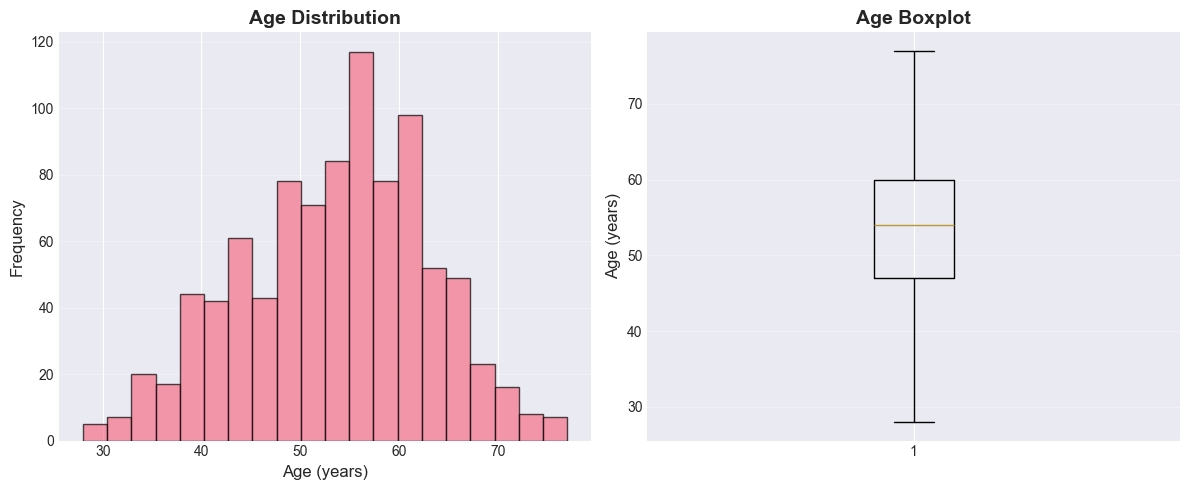

Age Statistics:
  Mean: 53.5 years
  Median: 54.0 years
  Range: 28 - 77 years


In [11]:
#21 Distribution of Age
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['age'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Age Distribution', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(df['age'], vert=True)
plt.ylabel('Age (years)', fontsize=12)
plt.title('Age Boxplot', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Age Statistics:")
print(f"  Mean: {df['age'].mean():.1f} years")
print(f"  Median: {df['age'].median():.1f} years")
print(f"  Range: {df['age'].min():.0f} - {df['age'].max():.0f} years")

**Age Distribution:**
- Patient ages range from 28 to 77 years with a mean around 54 years
- Distribution is relatively normal with slight right skew
- Highest concentration of patients in the 50-60 age range
- Interquartile range (middle 50%): approximately 47-60 years

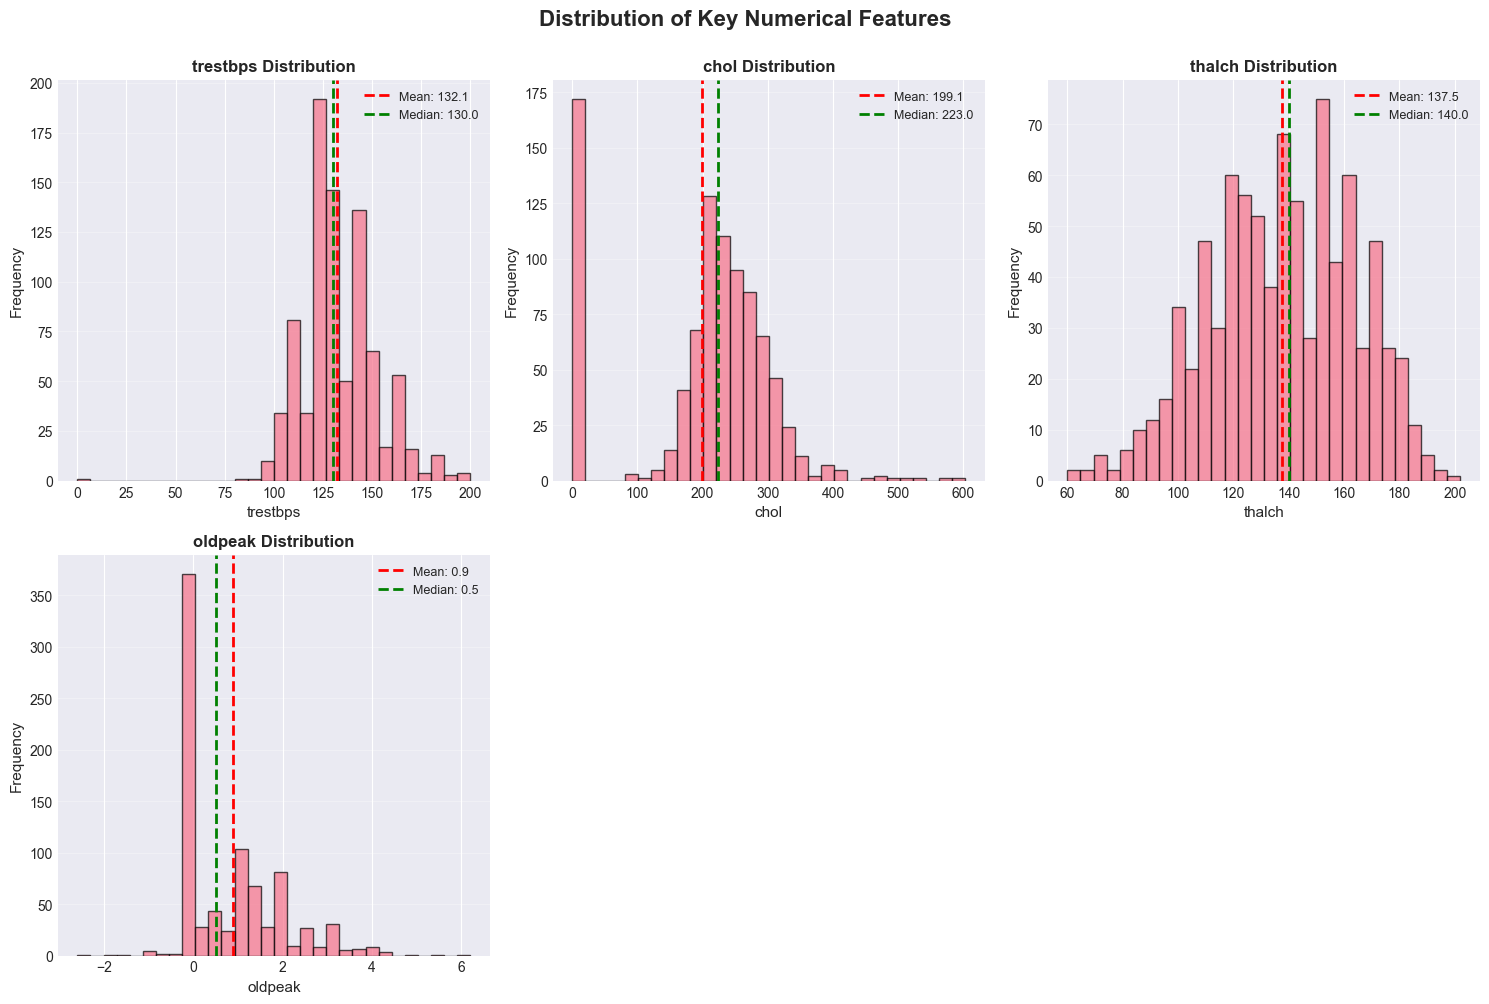

In [12]:
#23 Distribution of key numerical features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution of Key Numerical Features', fontsize=16, fontweight='bold', y=1.00)

# Select key numerical features (excluding id and ca due to missing values)
key_features = ['trestbps', 'chol', 'thalch', 'oldpeak']

for idx, col in enumerate(key_features):
    row = idx // 3
    col_idx = idx % 3
    
    # Remove NaN values for plotting
    data = df[col].dropna()
    
    axes[row, col_idx].hist(data, bins=30, edgecolor='black', alpha=0.7)
    axes[row, col_idx].set_xlabel(col, fontsize=11)
    axes[row, col_idx].set_ylabel('Frequency', fontsize=11)
    axes[row, col_idx].set_title(f'{col} Distribution', fontsize=12, fontweight='bold')
    axes[row, col_idx].grid(axis='y', alpha=0.3)
    
    # Add statistics
    mean_val = data.mean()
    median_val = data.median()
    axes[row, col_idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.1f}')
    axes[row, col_idx].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.1f}')
    axes[row, col_idx].legend(fontsize=9)

# Remove extra subplots
for idx in range(len(key_features), 6):
    row = idx // 3
    col_idx = idx % 3
    fig.delaxes(axes[row, col_idx])

plt.tight_layout()
plt.show()

**Numerical Features:**
- **Blood Pressure (trestbps)**: Mean ~132.1 mm Hg, with values ranging up to 200 mm Hg
- **Cholesterol (chol)**: Wide range with mean ~199.1 mg/dl, maximum value of 603 mg/dl
- **Max Heart Rate (thalch)**: Mean ~137.5 bpm, ranging from 60 to 202 bpm
- **ST Depression (oldpeak)**: Mean ~0.9, with most values concentrated near 0 and ranging from -2.6 to 6.2

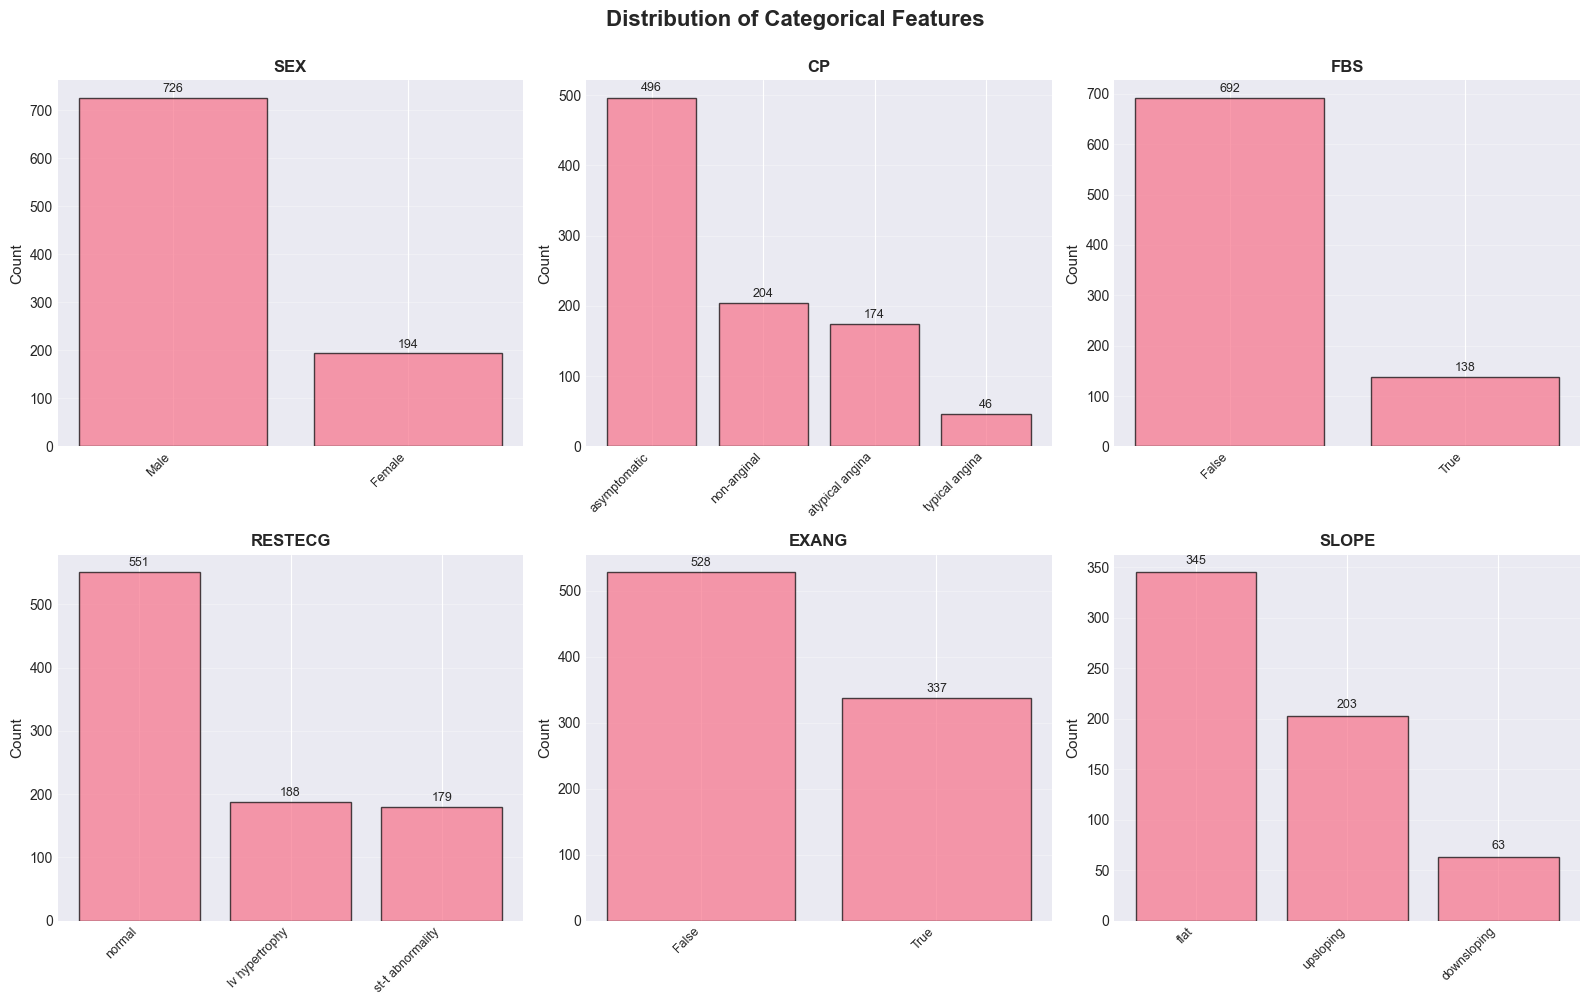

In [13]:
#25 Categorical features visualization
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Distribution of Categorical Features', fontsize=16, fontweight='bold', y=1.00)

# Select key categorical features (excluding dataset)
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope']

for idx, col in enumerate(cat_features):
    row = idx // 3
    col_idx = idx % 3
    
    # Get value counts
    value_counts = df[col].value_counts()
    
    # Create bar plot
    axes[row, col_idx].bar(range(len(value_counts)), value_counts.values, alpha=0.7, edgecolor='black')
    axes[row, col_idx].set_xticks(range(len(value_counts)))
    axes[row, col_idx].set_xticklabels(value_counts.index, rotation=45, ha='right', fontsize=9)
    axes[row, col_idx].set_ylabel('Count', fontsize=11)
    axes[row, col_idx].set_title(f'{col.upper()}', fontsize=12, fontweight='bold')
    axes[row, col_idx].grid(axis='y', alpha=0.3)
    
    # Add count labels on bars
    for i, v in enumerate(value_counts.values):
        axes[row, col_idx].text(i, v + 5, str(v), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

**Categorical Features:**
- **Sex**: 726 Male (79%), 194 Female (21%) - significant gender imbalance
- **Chest Pain (cp)**: 496 asymptomatic (54%), 204 non-anginal (22%), 174 atypical angina (19%), 46 typical angina (5%)
- **Fasting Blood Sugar (fbs)**: 692 False (75%), 138 True (15%)
- **Resting ECG (restecg)**: 551 normal (60%), 188 LV hypertrophy (20%), 179 ST-T abnormality (19%)
- **Exercise Angina (exang)**: 528 False (57%), 337 True (37%)
- **Slope**: 345 flat (38%), 203 upsloping (22%), 63 downsloping (7%)

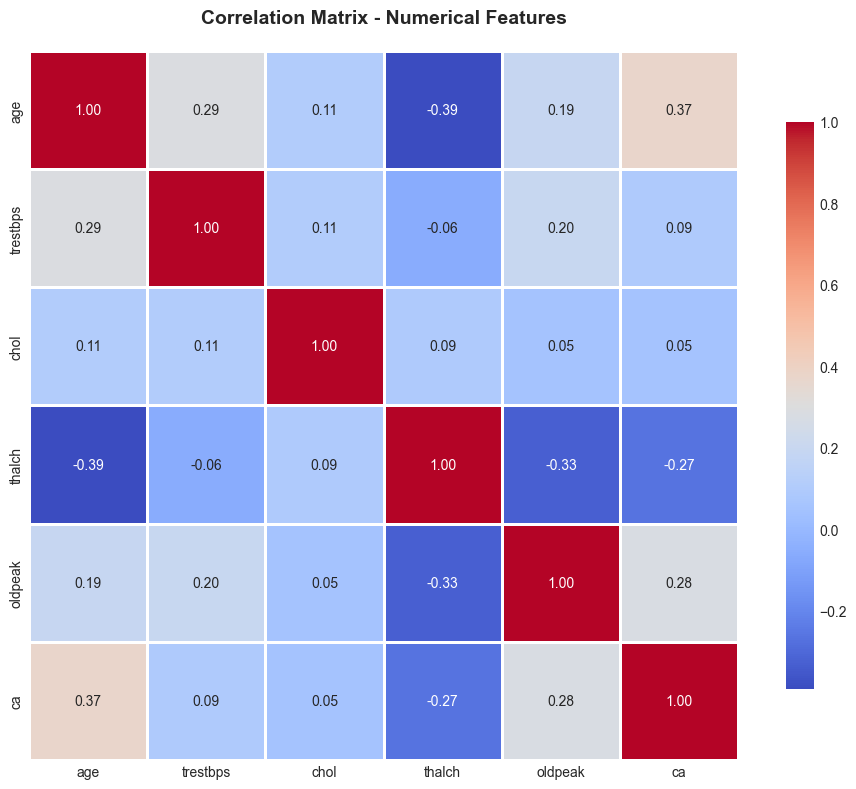


Key Correlations (|r| > 0.3):
  age ↔ thalch: -0.393
  age ↔ ca: 0.372
  thalch ↔ oldpeak: -0.333


In [14]:
#27 Correlation matrix for numerical features
# Select only numerical features (excluding id)
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

# Create correlation matrix (only for rows with complete data)
corr_data = df[numerical_features].dropna()
correlation_matrix = corr_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Numerical Features', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\nKey Correlations (|r| > 0.3):")
# Find strong correlations
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.3:
            print(f"  {correlation_matrix.columns[i]} ↔ {correlation_matrix.columns[j]}: {corr_val:.3f}")

**Correlations:**
- **age ↔ thalch (Maximum Heart Rate)**: -0.39 (moderate negative correlation)
- **age ↔ ca (Number of Major Vessels)**: 0.37 (moderate positive correlation)
- **thalch (Maximum Heart Rate) ↔ oldpeak (ST Depression)**: -0.33 (moderate negative correlation)
- Most other feature pairs show weak correlations (|r| < 0.3), indicating relatively independent information

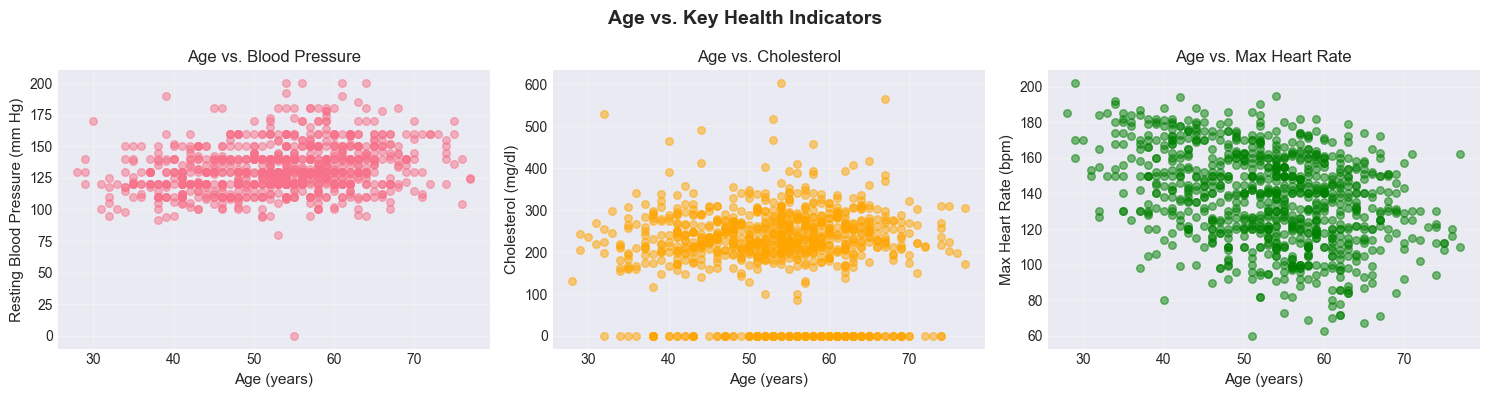

In [15]:
#30 Relationship between Age and other numerical features
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Age vs. Key Health Indicators', fontsize=14, fontweight='bold')

# Age vs Blood Pressure
axes[0].scatter(df['age'], df['trestbps'], alpha=0.5, s=30)
axes[0].set_xlabel('Age (years)', fontsize=11)
axes[0].set_ylabel('Resting Blood Pressure (mm Hg)', fontsize=11)
axes[0].set_title('Age vs. Blood Pressure', fontsize=12)
axes[0].grid(alpha=0.3)

# Age vs Cholesterol
axes[1].scatter(df['age'], df['chol'], alpha=0.5, s=30, color='orange')
axes[1].set_xlabel('Age (years)', fontsize=11)
axes[1].set_ylabel('Cholesterol (mg/dl)', fontsize=11)
axes[1].set_title('Age vs. Cholesterol', fontsize=12)
axes[1].grid(alpha=0.3)

# Age vs Max Heart Rate
axes[2].scatter(df['age'], df['thalch'], alpha=0.5, s=30, color='green')
axes[2].set_xlabel('Age (years)', fontsize=11)
axes[2].set_ylabel('Max Heart Rate (bpm)', fontsize=11)
axes[2].set_title('Age vs. Max Heart Rate', fontsize=12)
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

**Age vs. Key Health Indicators:**
- **Age vs. Blood Pressure**: No clear linear relationship; blood pressure values remain relatively constant across all age groups (mostly 100-160 mm Hg)
- **Age vs. Cholesterol**: No clear linear relationship; cholesterol values are widely distributed across all ages (mostly 150-350 mg/dl)
- **Age vs. Max Heart Rate**: Visible negative trend; older patients tend to have lower maximum heart rates, with values decreasing from ~180 bpm at younger ages to ~100-140 bpm at older ages

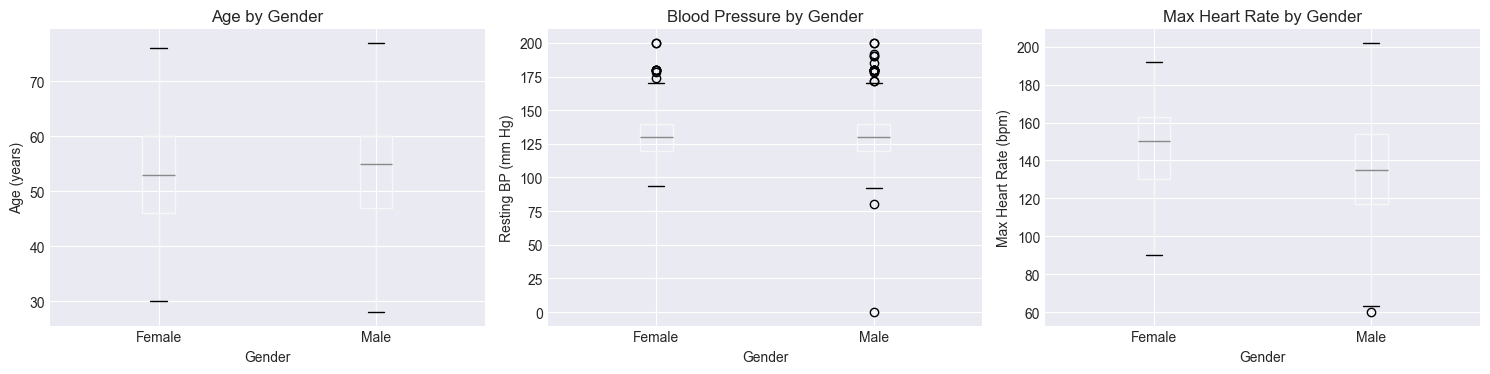


Gender-based Statistics:

Age:
         mean   std    min    max
sex                              
Female 52.474 9.496 30.000 76.000
Male   53.788 9.393 28.000 77.000

Resting Blood Pressure:
          mean    std    min     max
sex                                 
Female 132.094 19.509 94.000 200.000
Male   132.143 18.952  0.000 200.000

Max Heart Rate:
          mean    std    min     max
sex                                 
Female 146.245 22.193 90.000 192.000
Male   135.064 26.390 60.000 202.000


In [16]:
#32 Gender-based analysis
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Health Indicators by Gender', fontsize=14, fontweight='bold')

# Age distribution by gender
df.boxplot(column='age', by='sex', ax=axes[0])
axes[0].set_title('Age by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Age (years)')
axes[0].get_figure().suptitle('')  # Remove default title

# Blood pressure by gender
df.boxplot(column='trestbps', by='sex', ax=axes[1])
axes[1].set_title('Blood Pressure by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Resting BP (mm Hg)')
axes[1].get_figure().suptitle('')

# Max heart rate by gender
df.boxplot(column='thalch', by='sex', ax=axes[2])
axes[2].set_title('Max Heart Rate by Gender')
axes[2].set_xlabel('Gender')
axes[2].set_ylabel('Max Heart Rate (bpm)')
axes[2].get_figure().suptitle('')

plt.tight_layout()
plt.show()

# Print statistics
print("\nGender-based Statistics:")
print("\nAge:")
print(df.groupby('sex')['age'].describe()[['mean', 'std', 'min', 'max']])
print("\nResting Blood Pressure:")
print(df.groupby('sex')['trestbps'].describe()[['mean', 'std', 'min', 'max']])
print("\nMax Heart Rate:")
print(df.groupby('sex')['thalch'].describe()[['mean', 'std', 'min', 'max']])

**Gender-based Analysis:**
- **Age**: Female mean = 52.5 years, Male mean = 53.8 years - very similar distributions with comparable ranges (30-76 vs 28-77)
- **Resting Blood Pressure**: Female mean = 132.1 mm Hg, Male mean = 132.1 mm Hg - nearly identical means, though males show some extreme outliers (including 0 values likely indicating missing data)
- **Max Heart Rate**: Female mean = 146.2 bpm, Male mean = 135.1 bpm - females show notably higher average max heart rate (~11 bpm difference), with females ranging 90-192 bpm vs males 60-202 bpm
- Overall, max heart rate shows the most notable gender difference, while age and blood pressure are very similar between genders

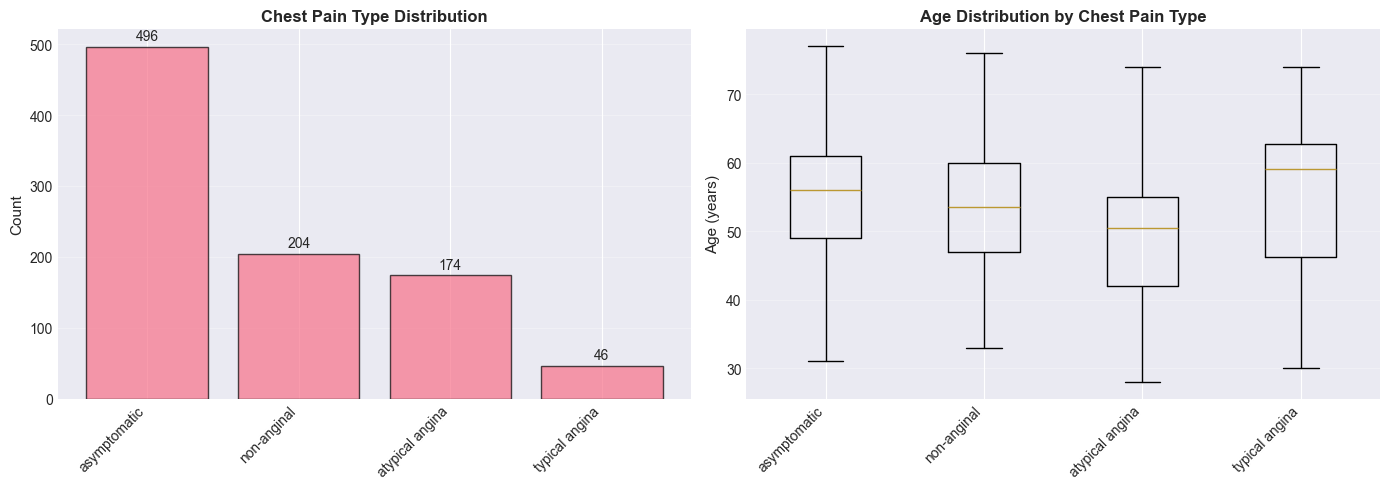


Average Age by Chest Pain Type:
  asymptomatic: 55.0 years
  non-anginal: 53.3 years
  atypical angina: 49.2 years
  typical angina: 54.8 years


In [17]:
#34 Chest pain type analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
cp_counts = df['cp'].value_counts()
axes[0].bar(range(len(cp_counts)), cp_counts.values, alpha=0.7, edgecolor='black')
axes[0].set_xticks(range(len(cp_counts)))
axes[0].set_xticklabels(cp_counts.index, rotation=45, ha='right')
axes[0].set_ylabel('Count', fontsize=11)
axes[0].set_title('Chest Pain Type Distribution', fontsize=12, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Add count labels
for i, v in enumerate(cp_counts.values):
    axes[0].text(i, v + 5, str(v), ha='center', va='bottom', fontsize=10)

# Chest pain vs Age
cp_age_data = [df[df['cp'] == cp_type]['age'].dropna() for cp_type in cp_counts.index]
axes[1].boxplot(cp_age_data, labels=cp_counts.index)
axes[1].set_xticklabels(cp_counts.index, rotation=45, ha='right')
axes[1].set_ylabel('Age (years)', fontsize=11)
axes[1].set_title('Age Distribution by Chest Pain Type', fontsize=12, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nAverage Age by Chest Pain Type:")
for cp_type in cp_counts.index:
    avg_age = df[df['cp'] == cp_type]['age'].mean()
    print(f"  {cp_type}: {avg_age:.1f} years")

**Chest Pain Type Analysis:**
- **Distribution**: Asymptomatic is the dominant group (496 patients, 54%), followed by non-anginal (204, 22%), atypical angina (174, 19%), and typical angina (46, 5%)
- **Age by Chest Pain Type**:
  - Asymptomatic: mean = 55.0 years
  - Non-anginal: mean = 53.3 years
  - Atypical angina: mean = 49.2 years (youngest group)
  - Typical angina: mean = 54.8 years
- **Age Distribution**: Boxplots show similar median ages and spreads across all chest pain types, with atypical angina patients being slightly younger on average
- Most patients in the dataset are asymptomatic, which may be an important consideration for clustering

Creating pairplot with 834 complete records...


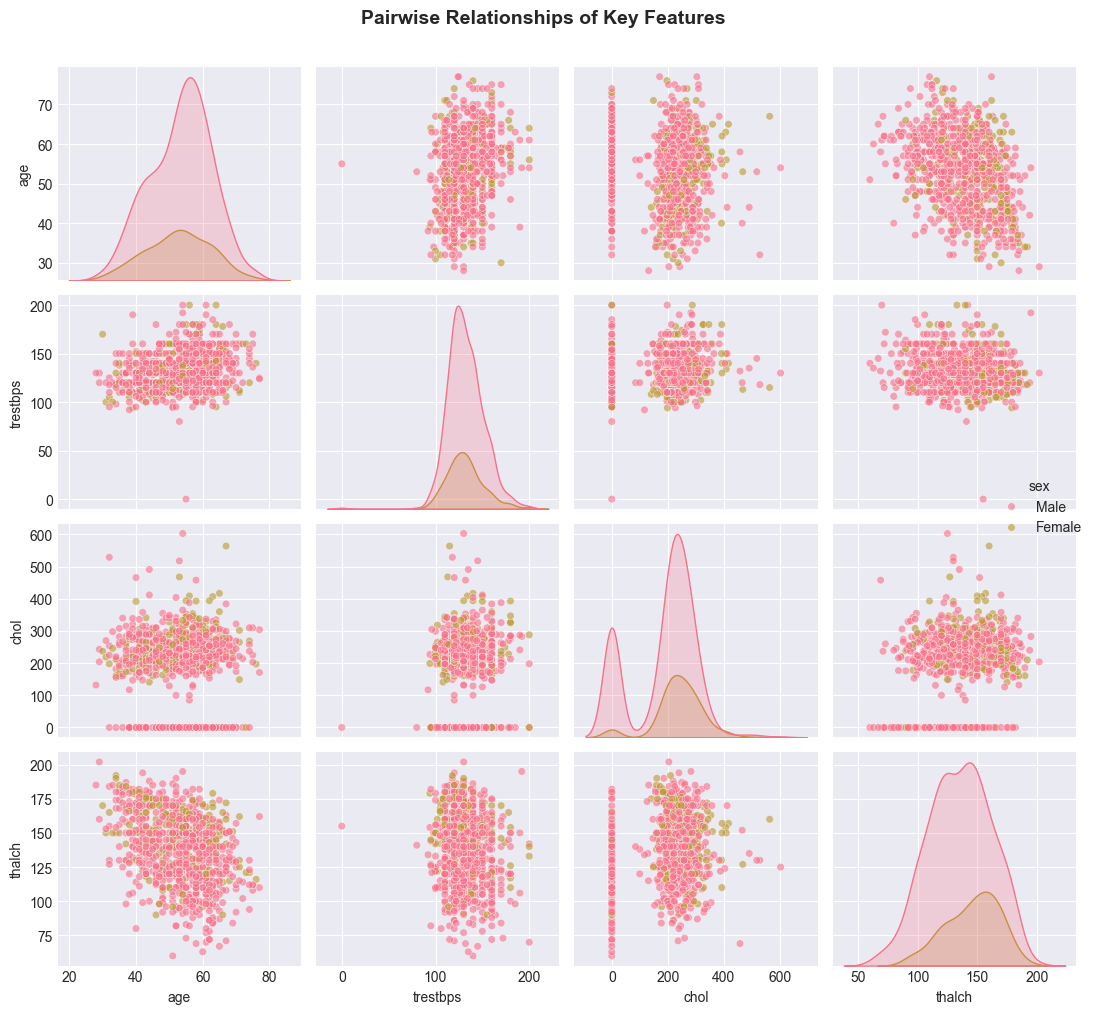


✓ Pairplot generated with 834 records (complete cases only)


In [18]:
#36 Pairplot for key numerical features (sample to avoid too much missing data)
# Use only complete cases for visualization
pairplot_features = ['age', 'trestbps', 'chol', 'thalch']
pairplot_data = df[pairplot_features + ['sex']].dropna()

print(f"Creating pairplot with {len(pairplot_data)} complete records...")

sns.pairplot(pairplot_data, hue='sex', diag_kind='kde', plot_kws={'alpha': 0.6, 's': 30}, 
             height=2.5, aspect=1)
plt.suptitle('Pairwise Relationships of Key Features', y=1.01, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\n✓ Pairplot generated with {len(pairplot_data)} records (complete cases only)")

**Pairwise Relationships Analysis (834 complete records):**

**Diagonal (Distributions by Gender):**
- **Age**: Males show broader distribution; females have narrower, more concentrated distribution around 50-60 years
- **Blood Pressure (trestbps)**: Both genders show similar distributions centered around 120-140 mm Hg
- **Cholesterol (chol)**: Bimodal distribution visible, with a cluster near 0 (likely missing/invalid data) and main distribution around 200-300 mg/dl
- **Max Heart Rate (thalch)**: Relatively normal distributions for both genders, centered around 140-160 bpm

**Scatter Plots (Relationships):**
- **Age vs thalch**: Clear negative trend visible - older patients have lower maximum heart rates
- **Age vs trestbps/chol**: No clear linear relationships; values scattered across all ages
- **trestbps vs chol**: No apparent correlation; independent variables
- **trestbps vs thalch**: No clear pattern; scattered distribution
- **chol vs thalch**: No apparent correlation; independent variables
- **Gender separation**: Male and female points overlap extensively in all scatter plots with no clear clustering by gender, indicating that these features do not strongly differentiate between genders

**Key Observations:**
- Most feature pairs show weak or no linear relationships, suggesting features capture different aspects of patient health
- The 0-value clusters in cholesterol indicate data quality issues that need addressing
- Gender does not create distinct clusters in the feature space, though slight distribution differences exist in age and thalch

#### **Analysis**: Initial Data Exploration

**Key Insights for Clustering:**

**Feature Characteristics:**
- **Age**: Normally distributed (mean ~53 years), shows moderate negative correlation with max heart rate (-0.39)
- **Numerical features**: Most show weak intercorrelations (|r| < 0.3), indicating they capture independent health aspects
- **Categorical features**: Highly imbalanced - asymptomatic chest pain (54%), male gender (79%)
- **Cholesterol**: Contains invalid 0-values that need cleaning

**Data Quality Issues:**
- Missing values concentrated in `ca` (611), `thal` (486), and `slope` (309) - primarily from Hungary, Switzerland, and VA Long Beach datasets
- Some features contain outliers and invalid values (e.g., blood pressure = 0)

**Clustering Considerations:**
- Gender does not create distinct clusters in the feature space
- Age vs. max heart rate shows clear negative relationship - may drive cluster separation
- Class imbalance in categorical features may affect cluster formation
- Missing data strategy needed: imputation and/or removal of incomplete records

**Next Steps:**
- Handle missing values and invalid entries
- Scale numerical features for k-means
- Encode categorical variables
- Consider feature selection based on variance and correlation analysis

### Step 4: Data Preprocessing

In [19]:
#40 Create a copy for preprocessing
df_processed = df.copy()

print("="*80)
print("DATA PREPROCESSING - INITIAL STATE")
print("="*80)
print(f"\nOriginal dataset shape: {df_processed.shape}")
print(f"Total missing values: {df_processed.isnull().sum().sum()}")

DATA PREPROCESSING - INITIAL STATE

Original dataset shape: (920, 15)
Total missing values: 1759


In [20]:
#41 Step 1: Remove identifier columns (id, dataset)
print("\n" + "="*80)
print("STEP 1: REMOVE IDENTIFIER COLUMNS")
print("="*80 + "\n")

# Remove id and dataset columns as they don't contribute to clustering
columns_to_remove = ['id', 'dataset']
df_processed = df_processed.drop(columns=columns_to_remove)

print(f"Removed columns: {columns_to_remove}")
print(f"New shape: {df_processed.shape}")
print(f"Remaining columns: {list(df_processed.columns)}")


STEP 1: REMOVE IDENTIFIER COLUMNS

Removed columns: ['id', 'dataset']
New shape: (920, 13)
Remaining columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [21]:
#42 Step 2a: Detect features with 0 values
print("\n" + "="*80)
print("STEP 2: DETECT AND HANDLE INVALID VALUES")
print("="*80 + "\n")

# Get numerical columns (excluding age which can't be 0)
numerical_cols = df_processed.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols = [col for col in numerical_cols if col != 'age']  # Age of 0 would be caught elsewhere

print("Checking for invalid 0 values in numerical features...")
print("(0 values may indicate missing data for certain medical measurements)\n")

# Check each numerical column for 0 values
zero_value_summary = []
for col in numerical_cols:
    zero_count = (df_processed[col] == 0).sum()
    if zero_count > 0:
        zero_pct = (zero_count / len(df_processed) * 100)
        zero_value_summary.append({
            'Column': col,
            'Zero_Count': zero_count,
            'Zero_Percentage': f"{zero_pct:.2f}%"
        })

if zero_value_summary:
    zero_df = pd.DataFrame(zero_value_summary)
    print("Features with 0 values detected:")
    print(zero_df.to_string(index=False))
else:
    print("✓ No 0 values found in numerical features")


STEP 2: DETECT AND HANDLE INVALID VALUES

Checking for invalid 0 values in numerical features...
(0 values may indicate missing data for certain medical measurements)

Features with 0 values detected:
  Column  Zero_Count Zero_Percentage
trestbps           1           0.11%
    chol         172          18.70%
 oldpeak         370          40.22%
      ca         181          19.67%


In [22]:
#43 Step 2b: Replace physiologically invalid 0 values with NaN
print("\n" + "="*80)
print("REPLACING INVALID 0 VALUES WITH NaN")
print("="*80 + "\n")

# Replace 0 with NaN for features where 0 is physiologically invalid
# NOTE: We only replace 0s that are medically impossible:
#   - trestbps (blood pressure): 0 = dead patient (impossible)
#   - chol (cholesterol): 0 = impossible in living humans
#   - thalch (max heart rate): 0 = dead patient (impossible)
# 
# We KEEP 0s that are valid medical values:
#   - oldpeak (ST depression): 0 = no ST depression (normal/healthy)
#   - ca (# of vessels colored): 0 = no blockages detected (healthy)
invalid_zero_cols = ['trestbps', 'chol', 'thalch']
cols_to_fix = [col for col in invalid_zero_cols if col in df_processed.columns]

print(f"Replacing 0 → NaN for physiologically invalid features: {cols_to_fix}")
print("(Note: oldpeak=0 and ca=0 are valid values and will be preserved)\n")

for col in cols_to_fix:
    zero_count = (df_processed[col] == 0).sum()
    if zero_count > 0:
        df_processed.loc[df_processed[col] == 0, col] = np.nan
        print(f"  {col}: {zero_count} zeros replaced with NaN")

print(f"\n✓ Replacement complete")
print(f"Total missing values after correction: {df_processed.isnull().sum().sum()}")


REPLACING INVALID 0 VALUES WITH NaN

Replacing 0 → NaN for physiologically invalid features: ['trestbps', 'chol', 'thalch']
(Note: oldpeak=0 and ca=0 are valid values and will be preserved)

  trestbps: 1 zeros replaced with NaN
  chol: 172 zeros replaced with NaN

✓ Replacement complete
Total missing values after correction: 1932


In [23]:
#43 Step 3: Analyze missing data strategy
print("\n" + "="*80)
print("STEP 3: MISSING DATA ANALYSIS")
print("="*80 + "\n")

# Calculate missing percentages
missing_summary = pd.DataFrame({
    'Column': df_processed.columns,
    'Missing_Count': df_processed.isnull().sum(),
    'Missing_Percentage': (df_processed.isnull().sum() / len(df_processed) * 100).round(2)
})

missing_summary = missing_summary[missing_summary['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

print("Missing values by column:")
print(missing_summary.to_string(index=False))

# Strategy: Drop columns with >50% missing, impute others
high_missing_cols = missing_summary[missing_summary['Missing_Percentage'] > 50]['Column'].tolist()
moderate_missing_cols = missing_summary[(missing_summary['Missing_Percentage'] > 0) & 
                                        (missing_summary['Missing_Percentage'] <= 50)]['Column'].tolist()

print(f"\n\nStrategy:")
print(f"  Drop columns (>50% missing): {high_missing_cols}")
print(f"  Impute columns (≤50% missing): {moderate_missing_cols}")


STEP 3: MISSING DATA ANALYSIS

Missing values by column:
  Column  Missing_Count  Missing_Percentage
      ca            611              66.410
    thal            486              52.830
   slope            309              33.590
    chol            202              21.960
     fbs             90               9.780
 oldpeak             62               6.740
trestbps             60               6.520
  thalch             55               5.980
   exang             55               5.980
 restecg              2               0.220


Strategy:
  Drop columns (>50% missing): ['ca', 'thal']
  Impute columns (≤50% missing): ['slope', 'chol', 'fbs', 'oldpeak', 'trestbps', 'thalch', 'exang', 'restecg']


In [24]:
#44 Step 4: Drop columns with >50% missing data
print("\n" + "="*80)
print("STEP 4: DROP HIGH-MISSING COLUMNS")
print("="*80 + "\n")

# Drop ca and thal (>50% missing)
df_processed = df_processed.drop(columns=high_missing_cols)

print(f"Dropped columns: {high_missing_cols}")
print(f"New shape: {df_processed.shape}")
print(f"Remaining columns: {list(df_processed.columns)}")


STEP 4: DROP HIGH-MISSING COLUMNS

Dropped columns: ['ca', 'thal']
New shape: (920, 11)
Remaining columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope']


In [25]:
#45 Step 5: Impute missing values
print("\n" + "="*80)
print("STEP 5: IMPUTE MISSING VALUES")
print("="*80 + "\n")

# Separate numerical and categorical columns
numerical_cols = df_processed.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df_processed.select_dtypes(include=['object', 'bool']).columns.tolist()

print(f"Numerical columns: {numerical_cols}")
print(f"Categorical columns: {categorical_cols}")

# Impute numerical columns with median
print("\nImputing numerical columns with median...")
for col in numerical_cols:
    if df_processed[col].isnull().sum() > 0:
        median_val = df_processed[col].median()
        missing_count = df_processed[col].isnull().sum()
        df_processed[col].fillna(median_val, inplace=True)
        print(f"  {col}: filled {missing_count} missing values with median = {median_val:.2f}")

# Impute categorical columns with mode
print("\nImputing categorical columns with mode...")
for col in categorical_cols:
    if df_processed[col].isnull().sum() > 0:
        mode_val = df_processed[col].mode()[0]
        missing_count = df_processed[col].isnull().sum()
        df_processed[col].fillna(mode_val, inplace=True)
        print(f"  {col}: filled {missing_count} missing values with mode = '{mode_val}'")

print(f"\n✓ Imputation complete")
print(f"Total missing values remaining: {df_processed.isnull().sum().sum()}")


STEP 5: IMPUTE MISSING VALUES

Numerical columns: ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
Categorical columns: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope']

Imputing numerical columns with median...
  trestbps: filled 60 missing values with median = 130.00
  chol: filled 202 missing values with median = 239.50
  thalch: filled 55 missing values with median = 140.00
  oldpeak: filled 62 missing values with median = 0.50

Imputing categorical columns with mode...
  fbs: filled 90 missing values with mode = 'False'
  restecg: filled 2 missing values with mode = 'normal'
  exang: filled 55 missing values with mode = 'False'
  slope: filled 309 missing values with mode = 'flat'

✓ Imputation complete
Total missing values remaining: 0


**Missing Value Handling:**
- Dropped `ca` and `thal` (>50% missing data)
- Imputed numerical features with median values
- Imputed categorical features with mode values
- All missing values have been addressed

In [26]:
#47 Step 6: Encode categorical variables
print("\n" + "="*80)
print("STEP 6: ENCODE CATEGORICAL VARIABLES")
print("="*80 + "\n")

# Create a copy for encoding
df_encoded = df_processed.copy()

# Binary encoding for binary categorical variables
binary_cols = ['sex', 'fbs', 'exang']
print("Binary encoding (0/1):")
for col in binary_cols:
    if col in df_encoded.columns:
        # Convert to binary (0/1)
        if df_encoded[col].dtype == 'object':
            unique_vals = df_encoded[col].unique()
            print(f"  {col}: {unique_vals[0]} → 0, {unique_vals[1]} → 1")
            df_encoded[col] = (df_encoded[col] == unique_vals[1]).astype(int)
        elif df_encoded[col].dtype == 'bool':
            print(f"  {col}: False → 0, True → 1")
            df_encoded[col] = df_encoded[col].astype(int)

# One-hot encoding for multi-class categorical variables
multi_class_cols = ['cp', 'restecg', 'slope']
print("\nOne-hot encoding:")
for col in multi_class_cols:
    if col in df_encoded.columns:
        print(f"  {col}: {df_encoded[col].nunique()} categories → {df_encoded[col].nunique()} binary columns")

df_encoded = pd.get_dummies(df_encoded, columns=multi_class_cols, prefix=multi_class_cols, drop_first=False)

print(f"\n✓ Encoding complete")
print(f"New shape: {df_encoded.shape}")
print(f"All columns: {list(df_encoded.columns)}")


STEP 6: ENCODE CATEGORICAL VARIABLES

Binary encoding (0/1):
  sex: Male → 0, Female → 1
  fbs: False → 0, True → 1
  exang: False → 0, True → 1

One-hot encoding:
  cp: 4 categories → 4 binary columns
  restecg: 3 categories → 3 binary columns
  slope: 3 categories → 3 binary columns

✓ Encoding complete
New shape: (920, 18)
All columns: ['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak', 'cp_asymptomatic', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina', 'restecg_lv hypertrophy', 'restecg_normal', 'restecg_st-t abnormality', 'slope_downsloping', 'slope_flat', 'slope_upsloping']


**Categorical Encoding:**
- **Binary encoding** (0/1): `sex`, `fbs`, `exang`
- **One-hot encoding**: `cp` (4 categories), `restecg` (3 categories), `slope` (3 categories)
- Total features increased from 11 to 18 after encoding

In [27]:
#49 Step 7: Feature Scaling (Standardization)
from sklearn.preprocessing import StandardScaler

print("\n" + "="*80)
print("STEP 7: FEATURE SCALING (STANDARDIZATION)")
print("="*80 + "\n")

# First, let's check what columns we actually have
print(f"Columns in df_encoded: {list(df_encoded.columns)}\n")

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the data
df_scaled = pd.DataFrame(
    scaler.fit_transform(df_encoded),
    columns=df_encoded.columns,
    index=df_encoded.index
)

# Select features that exist for comparison
sample_features = [col for col in ['age', 'trestbps', 'chol', 'thalch', 'oldpeak'] if col in df_encoded.columns]

print("Scaling statistics (before → after):")
print(f"\nBefore scaling (features: {sample_features}):")
print(df_encoded[sample_features].describe().loc[['mean', 'std']])

print(f"\nAfter scaling (same features):")
print(df_scaled[sample_features].describe().loc[['mean', 'std']])

print(f"\n✓ Scaling complete - all features now have mean ≈ 0 and std ≈ 1")
print(f"Final preprocessed dataset shape: {df_scaled.shape}")


STEP 7: FEATURE SCALING (STANDARDIZATION)

Columns in df_encoded: ['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak', 'cp_asymptomatic', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina', 'restecg_lv hypertrophy', 'restecg_normal', 'restecg_st-t abnormality', 'slope_downsloping', 'slope_flat', 'slope_upsloping']

Scaling statistics (before → after):

Before scaling (features: ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']):
        age  trestbps    chol  thalch  oldpeak
mean 53.511   132.137 245.223 137.692    0.853
std   9.425    17.930  51.785  25.145    1.058

After scaling (same features):
       age  trestbps   chol  thalch  oldpeak
mean 0.000    -0.000 -0.000  -0.000   -0.000
std  1.001     1.001  1.001   1.001    1.001

✓ Scaling complete - all features now have mean ≈ 0 and std ≈ 1
Final preprocessed dataset shape: (920, 18)


**Feature Scaling:**
- Applied **StandardScaler** (z-score normalization)
- All features now have mean ≈ 0 and standard deviation ≈ 1
- Essential for k-means clustering as it uses Euclidean distance

In [28]:
#51 Preprocessing Summary
print("\n" + "="*80)
print("DATA PREPROCESSING SUMMARY")
print("="*80 + "\n")

print("Original dataset:")
print(f"  Shape: {df.shape}")
print(f"  Features: {df.shape[1]}")
print(f"  Samples: {df.shape[0]}")

print("\nPreprocessed dataset:")
print(f"  Shape: {df_scaled.shape}")
print(f"  Features: {df_scaled.shape[1]}")
print(f"  Samples: {df_scaled.shape[0]}")

print("\nPreprocessing steps completed:")
print("  ✓ Removed identifier columns (id, dataset)")
print("  ✓ Handled invalid values (0 → NaN)")
print("  ✓ Dropped high-missing columns (ca, thal)")
print("  ✓ Imputed missing values (median/mode)")
print("  ✓ Encoded categorical variables (binary + one-hot)")
print("  ✓ Scaled features (StandardScaler)")

print("\n✓ Data is now ready for k-means clustering!")
print(f"Final feature set: {list(df_scaled.columns)}")


DATA PREPROCESSING SUMMARY

Original dataset:
  Shape: (920, 15)
  Features: 15
  Samples: 920

Preprocessed dataset:
  Shape: (920, 18)
  Features: 18
  Samples: 920

Preprocessing steps completed:
  ✓ Removed identifier columns (id, dataset)
  ✓ Handled invalid values (0 → NaN)
  ✓ Dropped high-missing columns (ca, thal)
  ✓ Imputed missing values (median/mode)
  ✓ Encoded categorical variables (binary + one-hot)
  ✓ Scaled features (StandardScaler)

✓ Data is now ready for k-means clustering!
Final feature set: ['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak', 'cp_asymptomatic', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina', 'restecg_lv hypertrophy', 'restecg_normal', 'restecg_st-t abnormality', 'slope_downsloping', 'slope_flat', 'slope_upsloping']


---
## Phase 2: Training

### Step 1: Determine Optimal Number of Clusters (K)

In [31]:
#54 Elbow Method - Calculate inertia for different K values
print("="*80)
print("ELBOW METHOD - FINDING OPTIMAL K")
print("="*80 + "\n")

# Test K values from 2 to 10
k_range = range(2, 11)
inertias = []
silhouette_scores = []

print("Testing different K values...")
for k in k_range:
    # Train K-means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    
    # Calculate metrics
    inertia = kmeans.inertia_
    silhouette = silhouette_score(df_scaled, kmeans.labels_)
    
    inertias.append(inertia)
    silhouette_scores.append(silhouette)
    
    print(f"  K={k}: Inertia={inertia:.2f}, Silhouette Score={silhouette:.4f}")

print("\n✓ Calculation complete")

ELBOW METHOD - FINDING OPTIMAL K

Testing different K values...
  K=2: Inertia=14524.15, Silhouette Score=0.1305
  K=3: Inertia=13232.49, Silhouette Score=0.1385
  K=4: Inertia=12301.52, Silhouette Score=0.1549
  K=5: Inertia=11208.26, Silhouette Score=0.1726
  K=6: Inertia=10352.41, Silhouette Score=0.1872
  K=7: Inertia=10036.24, Silhouette Score=0.1632
  K=8: Inertia=9399.51, Silhouette Score=0.1797
  K=9: Inertia=8763.73, Silhouette Score=0.1978
  K=10: Inertia=8589.45, Silhouette Score=0.1549

✓ Calculation complete


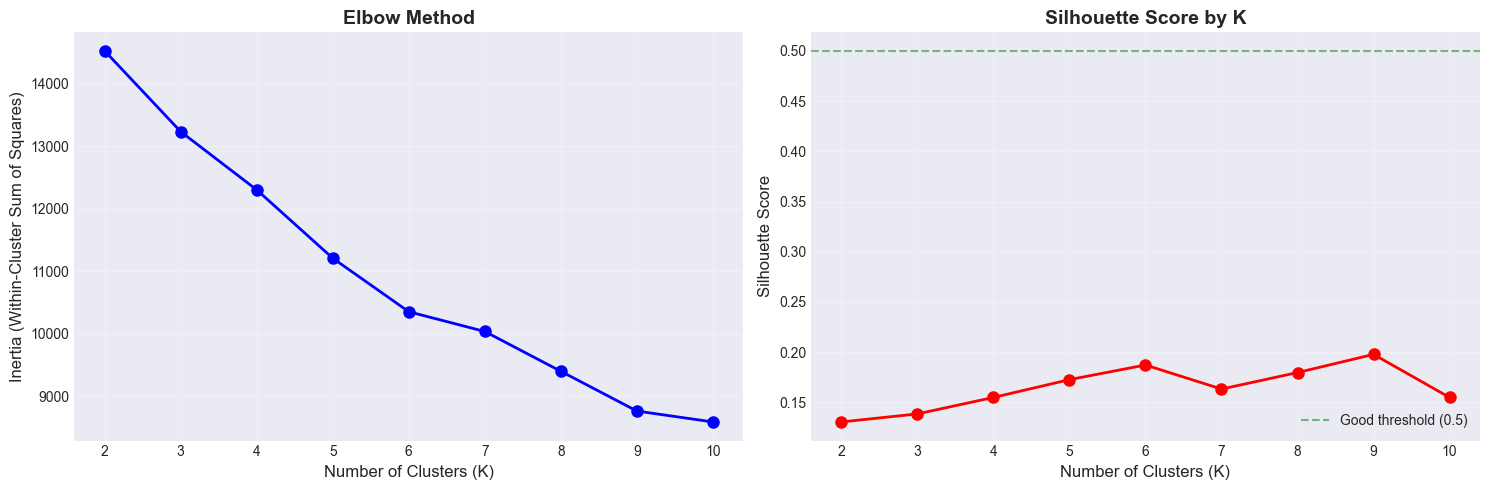


OPTIMAL K ANALYSIS

Based on Silhouette Score:
  Optimal K = 9
  Silhouette Score = 0.1978

Interpretation:
  - Silhouette Score ranges from -1 to 1
  - Scores > 0.5: Good cluster separation
  - Scores 0.25-0.5: Moderate cluster separation
  - Scores < 0.25: Weak cluster separation


In [32]:
#55 Visualize Elbow Method and Silhouette Scores
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Elbow plot
axes[0].plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (K)', fontsize=12)
axes[0].set_ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
axes[0].set_title('Elbow Method', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)
axes[0].set_xticks(k_range)

# Silhouette score plot
axes[1].plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (K)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Score by K', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)
axes[1].set_xticks(k_range)
axes[1].axhline(y=0.5, color='green', linestyle='--', alpha=0.5, label='Good threshold (0.5)')
axes[1].legend()

plt.tight_layout()
plt.show()

# Find optimal K based on silhouette score
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"\n{'='*80}")
print(f"OPTIMAL K ANALYSIS")
print(f"{'='*80}")
print(f"\nBased on Silhouette Score:")
print(f"  Optimal K = {optimal_k}")
print(f"  Silhouette Score = {max(silhouette_scores):.4f}")
print(f"\nInterpretation:")
print(f"  - Silhouette Score ranges from -1 to 1")
print(f"  - Scores > 0.5: Good cluster separation")
print(f"  - Scores 0.25-0.5: Moderate cluster separation")
print(f"  - Scores < 0.25: Weak cluster separation")

**Analysis: Optimal K Determination**

**Elbow Method Results:**
- The inertia curve shows a steep decline from K=2 to K=6, indicating significant improvement in cluster compactness
- After K=6, the curve continues to decrease but at a much slower rate
- A subtle "elbow" appears around K=6, where the rate of decrease begins to level off
- The gradual decline suggests no single obvious elbow point, which is common in real-world datasets

**Silhouette Score Results:**
- All silhouette scores are below 0.5, indicating **moderate to weak cluster separation**
- Scores range from approximately 0.13 to 0.20 across all K values
- The highest silhouette score appears at **K=9** (~0.20), followed closely by K=6 and K=8
- Scores remain relatively flat across different K values, suggesting the data doesn't have strongly defined natural clusters

**Optimal K Selection:**
Based on the analysis:
- **Silhouette score suggests K=9** (highest score ~0.20)
- **Elbow method suggests K=6** (elbow point where decline slows significantly)
- **Trade-off consideration**: K=6 balances both methods reasonably well (elbow point with decent silhouette score (0.1872))

**Interpretation:**
- The low silhouette scores (<0.25) indicate that clusters overlap significantly in the feature space
- This is expected for medical data where patient characteristics exist on a continuum rather than in distinct groups
- Despite weak separation, clustering can still reveal meaningful patient subgroups for clinical insights
- **Recommendation**: Proceed with K=6 (good balance) or K=9 (maximum silhouette score)